In [ ]:
import time
import pandas as pd

In [ ]:
RAW_DATA = pd.read_csv("/work/finals_rawdata.csv")
RAW_DATA.head()

,cust_ID,claim_amount,coverage,education,employment,gender,annual_income,location,marital_status,age,premium,months_since_last_claim,vehicle_size,police_report,witness_detail,happens_on_weekend,car_driveability,"Fraud Detected? Yes=1, No=0"
0,CZ20440,"4,291",Basic,High School or Below,Unemployed,F,0,Suburban,Single,20,108,1,Large,n,y,n,n,1
1,BF56053,"9,320",Premium,Bachelor,Medical Leave,F,18643,Suburban,Married,45,111,34,Medsize,y,y,y,y,0
2,PQ27923,"6,333",Extended,Master,Employed,M,71737,Urban,Divorced,19,125,7,Medsize,n,y,n,y,0
3,HG39060,"5,111",Basic,Bachelor,Unemployed,M,0,Suburban,Single,48,72,34,Medsize,y,y,n,n,0
4,OH41318,"26,122",Extended,Master,Employed,M,83385,Suburban,Divorced,53,119,26,Medsize,n,y,y,y,0


In [ ]:
jumlah_baris, jumlah_kolom = RAW_DATA.shape
print('baris = ', jumlah_baris, ', Kolom = ', jumlah_kolom)
print(RAW_DATA.info())

baris =  8000 , Kolom =  18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   cust_ID                      8000 non-null   object
 1   claim_amount                 8000 non-null   object
 2   coverage                     8000 non-null   object
 3   education                    8000 non-null   object
 4   employment                   8000 non-null   object
 5   gender                       8000 non-null   object
 6   annual_income                8000 non-null   int64 
 7   location                     8000 non-null   object
 8   marital_status               8000 non-null   object
 9   age                          8000 non-null   int64 
 10  premium                      8000 non-null   int64 
 11  months_since_last_claim      8000 non-null   int64 
 12  vehicle_size                 8000 non-null   object
 13  polic

**Data diatas masih terdapat beberapa variabel yang bertipe object. Harus dilakukan perubahan tipe data yang bersesuaian (category, integer, float)**

# Preprocessing

- RAW_DATA : variabel untuk data mentah
- DATA : variabel untuk data yang akan diproses

In [ ]:
### Feature Selection ###
## Pilih variabel X (feature) yang akan digunakan kemudian variabel y (target) ditempatkan pada index terakhir
selected_columns = ["claim_amount", "coverage", "education", "employment", 
                    "gender", "annual_income", "location", "marital_status",
                    "age", "premium", "months_since_last_claim", "vehicle_size",
                    "police_report", "witness_detail", "happens_on_weekend", "car_driveability",
                    "Fraud Detected? Yes=1, No=0"] # jangan diganti
# All features
#"claim_amount", "coverage", "education", "employment", 
#                    "gender", "annual_income", "location", "marital_status",
#                    "age", "premium", "months_since_last_claim", "vehicle_size",
#                    "police_report", "witness_detail", "happens_on_weekend", "car_driveability",
#                    "Fraud Detected? Yes=1, No=0"


DATA = RAW_DATA[selected_columns].copy()

### Mengubah tipe data (casting) ###

# Mengubah tipe data object menjadi integer
if 'claim_amount' in DATA.columns:
    DATA['claim_amount'] = DATA['claim_amount'].map(lambda x: x.replace(',', ''))  # menghapus koma untuk nilai ribuan pada kolom claim_amount
    DATA['claim_amount'] = DATA['claim_amount'].astype('int64')

# Mengubah tipe data object menjadi category
category_columns = {
    'coverage' : ['Basic', 'Premium', 'Extended'],
    'education': ['High School or Below', 'Bachelor', 'Master', 'College', 'Doctor'],
    'employment': ['Unemployed', 'Medical Leave', 'Employed', 'Disabled', 'Retired'],
    'gender': ['F', 'M'],
    'location': ['Suburban', 'Urban', 'Rural'],
    'marital_status': ['Single', 'Married', 'Divorced'],
    'vehicle_size': ['Large', 'Medsize', 'Small'],
    'police_report': ['n', 'y'],
    'witness_detail': ['n', 'y'],
    'happens_on_weekend': ['n', 'y'],
    'car_driveability': ['n', 'y']
}

# Mengubah data category
# Untuk untuk data yang hanya memiliki dua nilai diubah menjadi 1 dan 0 (yes dan no, M dan F)
# Selain itu 1, 2, ..., n 
for column, labels in category_columns.items():
    if column in selected_columns:
        DATA[column] = DATA[column].map(lambda x: labels.index(x) if len(labels) == 2 else labels.index(x) + 1)
        DATA[column] = DATA[column].astype('category')

DATA.info()
DATA.head()
DATA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   claim_amount                 8000 non-null   int64   
 1   coverage                     8000 non-null   category
 2   education                    8000 non-null   category
 3   employment                   8000 non-null   category
 4   gender                       8000 non-null   category
 5   annual_income                8000 non-null   int64   
 6   location                     8000 non-null   category
 7   marital_status               8000 non-null   category
 8   age                          8000 non-null   int64   
 9   premium                      8000 non-null   int64   
 10  months_since_last_claim      8000 non-null   int64   
 11  vehicle_size                 8000 non-null   category
 12  police_report                8000 non-null   category
 13  wit

,claim_amount,coverage,education,employment,gender,annual_income,location,marital_status,age,premium,months_since_last_claim,vehicle_size,police_report,witness_detail,happens_on_weekend,car_driveability,"Fraud Detected? Yes=1, No=0"
0,4291,1,1,1,0,0,1,1,20,108,1,1,0,1,0,0,1
1,9320,2,2,2,0,18643,1,2,45,111,34,2,1,1,1,1,0
2,6333,3,3,3,1,71737,2,3,19,125,7,2,0,1,0,1,0
3,5111,1,2,1,1,0,1,1,48,72,34,2,1,1,0,0,0
4,26122,3,3,3,1,83385,1,3,53,119,26,2,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10180,2,2,5,0,14290,1,2,32,273,20,2,0,1,0,1,0
7996,2570,1,2,3,0,44940,2,1,17,111,1,2,1,1,1,1,1
7997,11834,1,4,4,0,16552,1,2,50,93,23,3,0,1,0,1,0
7998,6274,3,4,5,0,18577,1,3,33,70,21,2,0,1,0,1,0


Feature: 0, Score: 0.25562
Feature: 1, Score: 0.01448
Feature: 2, Score: 0.02668
Feature: 3, Score: 0.01091
Feature: 4, Score: 0.01448
Feature: 5, Score: 0.14333
Feature: 6, Score: 0.01616
Feature: 7, Score: 0.01869
Feature: 8, Score: 0.06712
Feature: 9, Score: 0.10609
Feature: 10, Score: 0.21720
Feature: 11, Score: 0.01515
Feature: 12, Score: 0.03289
Feature: 13, Score: 0.03177
Feature: 14, Score: 0.01453
Feature: 15, Score: 0.01490


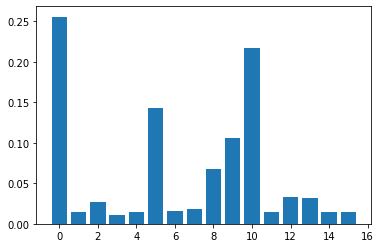

In [ ]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define variable
features = selected_columns[:-1]   # :-1 => index 0 sampai index terakhir (index terakhir tidak termasuk)
target = selected_columns[-1]      #  -1 => index terakhir
X = DATA[features].values
y = DATA[target].values
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


### 3 FEATURES

1) claim_amount
2) annual_income
3) months_since_last_claim

In [ ]:
selected_columns = ["claim_amount", "annual_income", "months_since_last_claim", 
                    "Fraud Detected? Yes=1, No=0"]
features = selected_columns[:-1]  # :-1 => index 0 sampai index terakhir (index terakhir tidak termasuk)
target = selected_columns[-1]      #  -1 => index terakhir
X = DATA[features].values
y = DATA[target].values
print("Variabel y yang akan digunakan pada model:",target)
print("Variabel X yang akan digunakan pada model:")
for i, col in enumerate(features):
    print(i+1, col)
print("X =", X)
print("y =", y)

Variabel y yang akan digunakan pada model: Fraud Detected? Yes=1, No=0
Variabel X yang akan digunakan pada model:
1 claim_amount
2 annual_income
3 months_since_last_claim
X = [[ 4291     0     1]
 [ 9320 18643    34]
 [ 6333 71737     7]
 ...
 [11834 16552    23]
 [ 6274 18577    21]
 [ 7294     0    12]]
y = [1 0 0 ... 0 0 0]


### Split data

Membagi data menjadi data train dan test secara acak masing-masing 70% dan 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Jumlah data train:", len(y_train))
print("Jumlah data test:", len(y_test))

Jumlah data train: 5600
Jumlah data test: 2400


#### Import library untuk evaluasi model 
- Accuracy
- Presicion
- Recall

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

## 1. Decision Trees

<!-- ![Decision Trees](https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png) -->
<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png" title="Decision Trees" width="400">

Dokumentasi: 
- [https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [https://scikit-learn.org/stable/modules/tree.html#tree-classification](https://scikit-learn.org/stable/modules/tree.html#tree-classification)

In [ ]:
# Import module
from sklearn.tree import DecisionTreeClassifier

# Inisialiasi model dengan hyperparameter default (lihat dokumentasi)
model_dtree = DecisionTreeClassifier()

n = 5               # Jumlah training
total_time = 0
total_precision = 0
total_recall = 0
total_accuracy = 0
total_auc = 0

for i in range(n):
    # Train Model
    start_time = time.time()
    model_dtree.fit(X_train, y_train)
    run_time = time.time() - start_time
    total_time += run_time

    # Test Model
    y_pred = model_dtree.predict(X_test)

    total_precision += precision_score(y_test, y_pred)
    total_recall += recall_score(y_test, y_pred)
    total_accuracy += accuracy_score(y_test, y_pred)
    total_auc += roc_auc_score(y_test, y_pred)

print("Average:")
print("Precision \t=", total_precision / n)
print("Recall \t\t=", total_recall / n)
print("Acuracy \t=", total_accuracy / n)
print("AUC \t\t=", total_auc / n)
print("Running time \t= {:.6f} second".format(total_time / n))

Average:
Precision 	= 0.52403170425575
Recall 		= 0.5318181818181819
Acuracy 	= 0.8081666666666667
AUC 		= 0.7048965648130576
Running time 	= 0.021180 second


### 4 FEATURES

1) claim_amount
2) annual_income
3) months_since_last_claim
4) premium

In [ ]:
selected_columns = ["claim_amount", "annual_income", "months_since_last_claim","premium", 
                    "Fraud Detected? Yes=1, No=0"]
features = selected_columns[:-1]  # :-1 => index 0 sampai index terakhir (index terakhir tidak termasuk)
target = selected_columns[-1]      #  -1 => index terakhir
X = DATA[features].values
y = DATA[target].values
print("Variabel y yang akan digunakan pada model:",target)
print("Variabel X yang akan digunakan pada model:")
for i, col in enumerate(features):
    print(i+1, col)
print("X =", X)
print("y =", y)

Variabel y yang akan digunakan pada model: Fraud Detected? Yes=1, No=0
Variabel X yang akan digunakan pada model:
1 claim_amount
2 annual_income
3 months_since_last_claim
4 premium
X = [[ 4291     0     1   108]
 [ 9320 18643    34   111]
 [ 6333 71737     7   125]
 ...
 [11834 16552    23    93]
 [ 6274 18577    21    70]
 [ 7294     0    12   147]]
y = [1 0 0 ... 0 0 0]


### Split data

Membagi data menjadi data train dan test secara acak masing-masing 70% dan 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Jumlah data train:", len(y_train))
print("Jumlah data test:", len(y_test))

Jumlah data train: 5600
Jumlah data test: 2400


In [ ]:
# Import module
from sklearn.tree import DecisionTreeClassifier

# Inisialiasi model dengan hyperparameter default (lihat dokumentasi)
model_dtree = DecisionTreeClassifier()

n = 5               # Jumlah training
total_time = 0
total_precision = 0
total_recall = 0
total_accuracy = 0
total_auc = 0

for i in range(n):
    # Train Model
    start_time = time.time()
    model_dtree.fit(X_train, y_train)
    run_time = time.time() - start_time
    total_time += run_time

    # Test Model
    y_pred = model_dtree.predict(X_test)

    total_precision += precision_score(y_test, y_pred)
    total_recall += recall_score(y_test, y_pred)
    total_accuracy += accuracy_score(y_test, y_pred)
    total_auc += roc_auc_score(y_test, y_pred)

print("Average:")
print("Precision \t=", total_precision / n)
print("Recall \t\t=", total_recall / n)
print("Acuracy \t=", total_accuracy / n)
print("AUC \t\t=", total_auc / n)
print("Running time \t= {:.6f} second".format(total_time / n))

Average:
Precision 	= 0.48473229820609187
Recall 		= 0.5367768595041322
Acuracy 	= 0.7915
AUC 		= 0.6963111854931936
Running time 	= 0.022478 second


### 5 FEATURES

1) claim_amount
2) annual_income
3) months_since_last_claim
4) premium
5) age

In [ ]:
selected_columns = ["claim_amount", "annual_income", "months_since_last_claim","premium","age",
                    "Fraud Detected? Yes=1, No=0"]
features = selected_columns[:-1]  # :-1 => index 0 sampai index terakhir (index terakhir tidak termasuk)
target = selected_columns[-1]      #  -1 => index terakhir
X = DATA[features].values
y = DATA[target].values
print("Variabel y yang akan digunakan pada model:",target)
print("Variabel X yang akan digunakan pada model:")
for i, col in enumerate(features):
    print(i+1, col)
print("X =", X)
print("y =", y)

Variabel y yang akan digunakan pada model: Fraud Detected? Yes=1, No=0
Variabel X yang akan digunakan pada model:
1 claim_amount
2 annual_income
3 months_since_last_claim
4 premium
5 age
X = [[ 4291     0     1   108    20]
 [ 9320 18643    34   111    45]
 [ 6333 71737     7   125    19]
 ...
 [11834 16552    23    93    50]
 [ 6274 18577    21    70    33]
 [ 7294     0    12   147    25]]
y = [1 0 0 ... 0 0 0]


### Split data

Membagi data menjadi data train dan test secara acak masing-masing 70% dan 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Jumlah data train:", len(y_train))
print("Jumlah data test:", len(y_test))

Jumlah data train: 5600
Jumlah data test: 2400


In [ ]:
# Import module
from sklearn.tree import DecisionTreeClassifier

# Inisialiasi model dengan hyperparameter default (lihat dokumentasi)
model_dtree = DecisionTreeClassifier()

n = 5               # Jumlah training
total_time = 0
total_precision = 0
total_recall = 0
total_accuracy = 0
total_auc = 0

for i in range(n):
    # Train Model
    start_time = time.time()
    model_dtree.fit(X_train, y_train)
    run_time = time.time() - start_time
    total_time += run_time

    # Test Model
    y_pred = model_dtree.predict(X_test)

    total_precision += precision_score(y_test, y_pred)
    total_recall += recall_score(y_test, y_pred)
    total_accuracy += accuracy_score(y_test, y_pred)
    total_auc += roc_auc_score(y_test, y_pred)

print("Average:")
print("Precision \t=", total_precision / n)
print("Recall \t\t=", total_recall / n)
print("Acuracy \t=", total_accuracy / n)
print("AUC \t\t=", total_auc / n)
print("Running time \t= {:.6f} second".format(total_time / n))

Average:
Precision 	= 0.5174181964103687
Recall 		= 0.5586776859504132
Acuracy 	= 0.8059166666666666
AUC 		= 0.7135246467330354
Running time 	= 0.023484 second


### ALL FEATURES EXCEPT cust_ID (16 FEATURES)

1) claim_amount                
2) coverage                     
3) education                    
4) employment                   
5) gender                       
6) annual_income                
7) location                     
8) marital_status               
9) age                          
10) premium                      
11) months_since_last_claim      
12) vehicle_size                 
13) police_report                
14) witness_detail               
15) happens_on_weekend           
16) car_driveability             

In [ ]:
selected_columns = ["claim_amount", "coverage", "education", "employment", 
                    "gender", "annual_income", "location", "marital_status",
                    "age", "premium", "months_since_last_claim", "vehicle_size",
                    "police_report", "witness_detail", "happens_on_weekend", "car_driveability",
                    "Fraud Detected? Yes=1, No=0"]
features = selected_columns[:-1]  # :-1 => index 0 sampai index terakhir (index terakhir tidak termasuk)
target = selected_columns[-1]      #  -1 => index terakhir
X = DATA[features].values
y = DATA[target].values
print("Variabel y yang akan digunakan pada model:",target)
print("Variabel X yang akan digunakan pada model:")
for i, col in enumerate(features):
    print(i+1, col)
print("X =", X)
print("y =", y)

Variabel y yang akan digunakan pada model: Fraud Detected? Yes=1, No=0
Variabel X yang akan digunakan pada model:
1 claim_amount
2 coverage
3 education
4 employment
5 gender
6 annual_income
7 location
8 marital_status
9 age
10 premium
11 months_since_last_claim
12 vehicle_size
13 police_report
14 witness_detail
15 happens_on_weekend
16 car_driveability
X = [[ 4291     1     1 ...     1     0     0]
 [ 9320     2     2 ...     1     1     1]
 [ 6333     3     3 ...     1     0     1]
 ...
 [11834     1     4 ...     1     0     1]
 [ 6274     3     4 ...     1     0     1]
 [ 7294     1     4 ...     0     1     1]]
y = [1 0 0 ... 0 0 0]


### Split data

Membagi data menjadi data train dan test secara acak masing-masing 70% dan 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Jumlah data train:", len(y_train))
print("Jumlah data test:", len(y_test))

Jumlah data train: 5600
Jumlah data test: 2400


In [ ]:
# Import module
from sklearn.tree import DecisionTreeClassifier

# Inisialiasi model dengan hyperparameter default (lihat dokumentasi)
model_dtree = DecisionTreeClassifier()

n = 5               # Jumlah training
total_time = 0
total_precision = 0
total_recall = 0
total_accuracy = 0
total_auc = 0

for i in range(n):
    # Train Model
    start_time = time.time()
    model_dtree.fit(X_train, y_train)
    run_time = time.time() - start_time
    total_time += run_time

    # Test Model
    y_pred = model_dtree.predict(X_test)

    total_precision += precision_score(y_test, y_pred)
    total_recall += recall_score(y_test, y_pred)
    total_accuracy += accuracy_score(y_test, y_pred)
    total_auc += roc_auc_score(y_test, y_pred)

print("Average:")
print("Precision \t=", total_precision / n)
print("Recall \t\t=", total_recall / n)
print("Acuracy \t=", total_accuracy / n)
print("AUC \t\t=", total_auc / n)
print("Running time \t= {:.6f} second".format(total_time / n))

Average:
Precision 	= 0.53674044764846
Recall 		= 0.5673553719008264
Acuracy 	= 0.8140000000000001
AUC 		= 0.7218300867854863
Running time 	= 0.030643 second


### 2 FEATURES

1) claim_amount
2) months_since_last_claim

In [ ]:
selected_columns = ["claim_amount","months_since_last_claim",
                    "Fraud Detected? Yes=1, No=0"]
features = selected_columns[:-1]  # :-1 => index 0 sampai index terakhir (index terakhir tidak termasuk)
target = selected_columns[-1]      #  -1 => index terakhir
X = DATA[features].values
y = DATA[target].values
print("Variabel y yang akan digunakan pada model:",target)
print("Variabel X yang akan digunakan pada model:")
for i, col in enumerate(features):
    print(i+1, col)
print("X =", X)
print("y =", y)

Variabel y yang akan digunakan pada model: Fraud Detected? Yes=1, No=0
Variabel X yang akan digunakan pada model:
1 claim_amount
2 months_since_last_claim
X = [[ 4291     1]
 [ 9320    34]
 [ 6333     7]
 ...
 [11834    23]
 [ 6274    21]
 [ 7294    12]]
y = [1 0 0 ... 0 0 0]


### Split data

Membagi data menjadi data train dan test secara acak masing-masing 70% dan 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Jumlah data train:", len(y_train))
print("Jumlah data test:", len(y_test))

Jumlah data train: 5600
Jumlah data test: 2400


In [ ]:
# Import module
from sklearn.tree import DecisionTreeClassifier

# Inisialiasi model dengan hyperparameter default (lihat dokumentasi)
model_dtree = DecisionTreeClassifier()

n = 5               # Jumlah training
total_time = 0
total_precision = 0
total_recall = 0
total_accuracy = 0
total_auc = 0

for i in range(n):
    # Train Model
    start_time = time.time()
    model_dtree.fit(X_train, y_train)
    run_time = time.time() - start_time
    total_time += run_time

    # Test Model
    y_pred = model_dtree.predict(X_test)

    total_precision += precision_score(y_test, y_pred)
    total_recall += recall_score(y_test, y_pred)
    total_accuracy += accuracy_score(y_test, y_pred)
    total_auc += roc_auc_score(y_test, y_pred)

print("Average:")
print("Precision \t=", total_precision / n)
print("Recall \t\t=", total_recall / n)
print("Acuracy \t=", total_accuracy / n)
print("AUC \t\t=", total_auc / n)
print("Running time \t= {:.6f} second".format(total_time / n))

Average:
Precision 	= 0.4700424883817134
Recall 		= 0.48264462809917363
Acuracy 	= 0.7859166666666667
AUC 		= 0.6725853620662883
Running time 	= 0.011867 second


### 1 FEATURE

1) claim_amount


In [ ]:
selected_columns = ["claim_amount",
                    "Fraud Detected? Yes=1, No=0"]
features = selected_columns[:-1]  # :-1 => index 0 sampai index terakhir (index terakhir tidak termasuk)
target = selected_columns[-1]      #  -1 => index terakhir
X = DATA[features].values
y = DATA[target].values
print("Variabel y yang akan digunakan pada model:",target)
print("Variabel X yang akan digunakan pada model:")
for i, col in enumerate(features):
    print(i+1, col)
print("X =", X)
print("y =", y)

Variabel y yang akan digunakan pada model: Fraud Detected? Yes=1, No=0
Variabel X yang akan digunakan pada model:
1 claim_amount
X = [[ 4291]
 [ 9320]
 [ 6333]
 ...
 [11834]
 [ 6274]
 [ 7294]]
y = [1 0 0 ... 0 0 0]


### Split data

Membagi data menjadi data train dan test secara acak masing-masing 70% dan 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Jumlah data train:", len(y_train))
print("Jumlah data test:", len(y_test))

Jumlah data train: 5600
Jumlah data test: 2400


In [ ]:
# Import module
from sklearn.tree import DecisionTreeClassifier

# Inisialiasi model dengan hyperparameter default (lihat dokumentasi)
model_dtree = DecisionTreeClassifier()

n = 5               # Jumlah training
total_time = 0
total_precision = 0
total_recall = 0
total_accuracy = 0
total_auc = 0

for i in range(n):
    # Train Model
    start_time = time.time()
    model_dtree.fit(X_train, y_train)
    run_time = time.time() - start_time
    total_time += run_time

    # Test Model
    y_pred = model_dtree.predict(X_test)

    total_precision += precision_score(y_test, y_pred)
    total_recall += recall_score(y_test, y_pred)
    total_accuracy += accuracy_score(y_test, y_pred)
    total_auc += roc_auc_score(y_test, y_pred)

print("Average:")
print("Precision \t=", total_precision / n)
print("Recall \t\t=", total_recall / n)
print("Acuracy \t=", total_accuracy / n)
print("AUC \t\t=", total_auc / n)
print("Running time \t= {:.6f} second".format(total_time / n))

Average:
Precision 	= 0.3475177304964539
Recall 		= 0.3037190082644628
Acuracy 	= 0.7445833333333334
AUC 		= 0.5798344519401646
Running time 	= 0.013584 second


## 2. K-Nearest Neighbors

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_nearest_centroid_001.png" title="K-Nearest Neighbors" width="400" style="display: inline;"/>
<!-- <img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_nearest_centroid_001.png" title="K-Nearest Neighbors" width="200" style="display: inline;"> -->

Dokumentasi: 
- [https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)

### 3 FEATURES

1) claim_amount
2) annual_income
3) months_since_last_claim

In [ ]:
selected_columns = ["claim_amount", "annual_income", "months_since_last_claim", 
                    "Fraud Detected? Yes=1, No=0"]
features = selected_columns[:-1]  # :-1 => index 0 sampai index terakhir (index terakhir tidak termasuk)
target = selected_columns[-1]      #  -1 => index terakhir
X = DATA[features].values
y = DATA[target].values
print("Variabel y yang akan digunakan pada model:",target)
print("Variabel X yang akan digunakan pada model:")
for i, col in enumerate(features):
    print(i+1, col)
print("X =", X)
print("y =", y)

Variabel y yang akan digunakan pada model: Fraud Detected? Yes=1, No=0
Variabel X yang akan digunakan pada model:
1 claim_amount
2 annual_income
3 months_since_last_claim
X = [[ 4291     0     1]
 [ 9320 18643    34]
 [ 6333 71737     7]
 ...
 [11834 16552    23]
 [ 6274 18577    21]
 [ 7294     0    12]]
y = [1 0 0 ... 0 0 0]


### Split data

Membagi data menjadi data train dan test secara acak masing-masing 70% dan 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Jumlah data train:", len(y_train))
print("Jumlah data test:", len(y_test))

Jumlah data train: 5600
Jumlah data test: 2400


In [ ]:
# Import module
from sklearn.neighbors import KNeighborsClassifier

# Inisialiasi model dengan k = 16 dan hyperparameter default (lihat dokumentasi)
model_knn = KNeighborsClassifier(n_neighbors=16)

n = 5                # Jumlah training
total_time = 0
total_precision = 0
total_recall = 0
total_accuracy = 0
total_auc = 0

for i in range(n):
    # Train Model
    start_time = time.time()
    model_knn.fit(X_train, y_train)
    run_time = time.time() - start_time
    total_time += run_time

    # Test Model
    y_pred = model_knn.predict(X_test)

    total_precision += precision_score(y_test, y_pred)
    total_recall += recall_score(y_test, y_pred)
    total_accuracy += accuracy_score(y_test, y_pred)
    total_auc += roc_auc_score(y_test, y_pred)

print("Average:")
print("Precision \t=", total_precision / n)
print("Recall \t\t=", total_recall / n)
print("Acuracy \t=", total_accuracy / n)
print("AUC \t\t=", total_auc / n)
print("Running time \t= {:.6f} second".format(total_time / n))

Average:
Precision 	= 0.5595854922279793
Recall 		= 0.2231404958677686
Acuracy 	= 0.8079166666666666
AUC 		= 0.5893886195414
Running time 	= 0.004568 second


### 4 FEATURES

1) claim_amount
2) annual_income
3) months_since_last_claim
4) premium

In [ ]:
selected_columns = ["claim_amount", "annual_income", "months_since_last_claim","premium", 
                    "Fraud Detected? Yes=1, No=0"]
features = selected_columns[:-1]  # :-1 => index 0 sampai index terakhir (index terakhir tidak termasuk)
target = selected_columns[-1]      #  -1 => index terakhir
X = DATA[features].values
y = DATA[target].values
print("Variabel y yang akan digunakan pada model:",target)
print("Variabel X yang akan digunakan pada model:")
for i, col in enumerate(features):
    print(i+1, col)
print("X =", X)
print("y =", y)

Variabel y yang akan digunakan pada model: Fraud Detected? Yes=1, No=0
Variabel X yang akan digunakan pada model:
1 claim_amount
2 annual_income
3 months_since_last_claim
4 premium
X = [[ 4291     0     1   108]
 [ 9320 18643    34   111]
 [ 6333 71737     7   125]
 ...
 [11834 16552    23    93]
 [ 6274 18577    21    70]
 [ 7294     0    12   147]]
y = [1 0 0 ... 0 0 0]


### Split data

Membagi data menjadi data train dan test secara acak masing-masing 70% dan 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Jumlah data train:", len(y_train))
print("Jumlah data test:", len(y_test))

Jumlah data train: 5600
Jumlah data test: 2400


In [ ]:
# Import module
from sklearn.neighbors import KNeighborsClassifier

# Inisialiasi model dengan k = 16 dan hyperparameter default (lihat dokumentasi)
model_knn = KNeighborsClassifier(n_neighbors=16)

n = 5                # Jumlah training
total_time = 0
total_precision = 0
total_recall = 0
total_accuracy = 0
total_auc = 0

for i in range(n):
    # Train Model
    start_time = time.time()
    model_knn.fit(X_train, y_train)
    run_time = time.time() - start_time
    total_time += run_time

    # Test Model
    y_pred = model_knn.predict(X_test)

    total_precision += precision_score(y_test, y_pred)
    total_recall += recall_score(y_test, y_pred)
    total_accuracy += accuracy_score(y_test, y_pred)
    total_auc += roc_auc_score(y_test, y_pred)

print("Average:")
print("Precision \t=", total_precision / n)
print("Recall \t\t=", total_recall / n)
print("Acuracy \t=", total_accuracy / n)
print("AUC \t\t=", total_auc / n)
print("Running time \t= {:.6f} second".format(total_time / n))

Average:
Precision 	= 0.6185567010309279
Recall 		= 0.24793388429752067
Acuracy 	= 0.8175000000000001
AUC 		= 0.6046558774305976
Running time 	= 0.004430 second


### 5 FEATURES

1) claim_amount
2) annual_income
3) months_since_last_claim
4) premium
5) age

In [ ]:
selected_columns = ["claim_amount", "annual_income", "months_since_last_claim","premium", "age",
                    "Fraud Detected? Yes=1, No=0"]
features = selected_columns[:-1]  # :-1 => index 0 sampai index terakhir (index terakhir tidak termasuk)
target = selected_columns[-1]      #  -1 => index terakhir
X = DATA[features].values
y = DATA[target].values
print("Variabel y yang akan digunakan pada model:",target)
print("Variabel X yang akan digunakan pada model:")
for i, col in enumerate(features):
    print(i+1, col)
print("X =", X)
print("y =", y)

Variabel y yang akan digunakan pada model: Fraud Detected? Yes=1, No=0
Variabel X yang akan digunakan pada model:
1 claim_amount
2 annual_income
3 months_since_last_claim
4 premium
5 age
X = [[ 4291     0     1   108    20]
 [ 9320 18643    34   111    45]
 [ 6333 71737     7   125    19]
 ...
 [11834 16552    23    93    50]
 [ 6274 18577    21    70    33]
 [ 7294     0    12   147    25]]
y = [1 0 0 ... 0 0 0]


### Split data

Membagi data menjadi data train dan test secara acak masing-masing 70% dan 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Jumlah data train:", len(y_train))
print("Jumlah data test:", len(y_test))

Jumlah data train: 5600
Jumlah data test: 2400


In [ ]:
# Import module
from sklearn.neighbors import KNeighborsClassifier

# Inisialiasi model dengan k = 16 dan hyperparameter default (lihat dokumentasi)
model_knn = KNeighborsClassifier(n_neighbors=16)

n = 5                # Jumlah training
total_time = 0
total_precision = 0
total_recall = 0
total_accuracy = 0
total_auc = 0

for i in range(n):
    # Train Model
    start_time = time.time()
    model_knn.fit(X_train, y_train)
    run_time = time.time() - start_time
    total_time += run_time

    # Test Model
    y_pred = model_knn.predict(X_test)

    total_precision += precision_score(y_test, y_pred)
    total_recall += recall_score(y_test, y_pred)
    total_accuracy += accuracy_score(y_test, y_pred)
    total_auc += roc_auc_score(y_test, y_pred)

print("Average:")
print("Precision \t=", total_precision / n)
print("Recall \t\t=", total_recall / n)
print("Acuracy \t=", total_accuracy / n)
print("AUC \t\t=", total_auc / n)
print("Running time \t= {:.6f} second".format(total_time / n))

Average:
Precision 	= 0.6326530612244898
Recall 		= 0.256198347107438
Acuracy 	= 0.82
AUC 		= 0.6093100295036146
Running time 	= 0.005547 second


### ALL FEATURES EXCEPT cust_ID (16 FEATURES)

1) claim_amount                
2) coverage                     
3) education                    
4) employment                   
5) gender                       
6) annual_income                
7) location                     
8) marital_status               
9) age                          
10) premium                      
11) months_since_last_claim      
12) vehicle_size                 
13) police_report                
14) witness_detail               
15) happens_on_weekend           
16) car_driveability             

In [ ]:
selected_columns = ["claim_amount", "coverage", "education", "employment", 
                    "gender", "annual_income", "location", "marital_status",
                    "age", "premium", "months_since_last_claim", "vehicle_size",
                    "police_report", "witness_detail", "happens_on_weekend", "car_driveability",
                    "Fraud Detected? Yes=1, No=0"]
features = selected_columns[:-1]  # :-1 => index 0 sampai index terakhir (index terakhir tidak termasuk)
target = selected_columns[-1]      #  -1 => index terakhir
X = DATA[features].values
y = DATA[target].values
print("Variabel y yang akan digunakan pada model:",target)
print("Variabel X yang akan digunakan pada model:")
for i, col in enumerate(features):
    print(i+1, col)
print("X =", X)
print("y =", y)

Variabel y yang akan digunakan pada model: Fraud Detected? Yes=1, No=0
Variabel X yang akan digunakan pada model:
1 claim_amount
2 coverage
3 education
4 employment
5 gender
6 annual_income
7 location
8 marital_status
9 age
10 premium
11 months_since_last_claim
12 vehicle_size
13 police_report
14 witness_detail
15 happens_on_weekend
16 car_driveability
X = [[ 4291     1     1 ...     1     0     0]
 [ 9320     2     2 ...     1     1     1]
 [ 6333     3     3 ...     1     0     1]
 ...
 [11834     1     4 ...     1     0     1]
 [ 6274     3     4 ...     1     0     1]
 [ 7294     1     4 ...     0     1     1]]
y = [1 0 0 ... 0 0 0]


### Split data

Membagi data menjadi data train dan test secara acak masing-masing 70% dan 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Jumlah data train:", len(y_train))
print("Jumlah data test:", len(y_test))

Jumlah data train: 5600
Jumlah data test: 2400


In [ ]:
# Import module
from sklearn.neighbors import KNeighborsClassifier

# Inisialiasi model dengan k = 16 dan hyperparameter default (lihat dokumentasi)
model_knn = KNeighborsClassifier(n_neighbors=16)

n = 5                # Jumlah training
total_time = 0
total_precision = 0
total_recall = 0
total_accuracy = 0
total_auc = 0

for i in range(n):
    # Train Model
    start_time = time.time()
    model_knn.fit(X_train, y_train)
    run_time = time.time() - start_time
    total_time += run_time

    # Test Model
    y_pred = model_knn.predict(X_test)

    total_precision += precision_score(y_test, y_pred)
    total_recall += recall_score(y_test, y_pred)
    total_accuracy += accuracy_score(y_test, y_pred)
    total_auc += roc_auc_score(y_test, y_pred)

print("Average:")
print("Precision \t=", total_precision / n)
print("Recall \t\t=", total_recall / n)
print("Acuracy \t=", total_accuracy / n)
print("AUC \t\t=", total_auc / n)
print("Running time \t= {:.6f} second".format(total_time / n))

Average:
Precision 	= 0.6326530612244898
Recall 		= 0.256198347107438
Acuracy 	= 0.82
AUC 		= 0.6093100295036146
Running time 	= 0.000829 second


### 2 FEATURES

1) claim_amount
2) months_since_last_claim

In [ ]:
selected_columns = ["claim_amount", "months_since_last_claim",
                    "Fraud Detected? Yes=1, No=0"]
features = selected_columns[:-1]  # :-1 => index 0 sampai index terakhir (index terakhir tidak termasuk)
target = selected_columns[-1]      #  -1 => index terakhir
X = DATA[features].values
y = DATA[target].values
print("Variabel y yang akan digunakan pada model:",target)
print("Variabel X yang akan digunakan pada model:")
for i, col in enumerate(features):
    print(i+1, col)
print("X =", X)
print("y =", y)

Variabel y yang akan digunakan pada model: Fraud Detected? Yes=1, No=0
Variabel X yang akan digunakan pada model:
1 claim_amount
2 months_since_last_claim
X = [[ 4291     1]
 [ 9320    34]
 [ 6333     7]
 ...
 [11834    23]
 [ 6274    21]
 [ 7294    12]]
y = [1 0 0 ... 0 0 0]


### Split data

Membagi data menjadi data train dan test secara acak masing-masing 70% dan 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Jumlah data train:", len(y_train))
print("Jumlah data test:", len(y_test))

Jumlah data train: 5600
Jumlah data test: 2400


In [ ]:
# Import module
from sklearn.neighbors import KNeighborsClassifier

# Inisialiasi model dengan k = 16 dan hyperparameter default (lihat dokumentasi)
model_knn = KNeighborsClassifier(n_neighbors=16)

n = 5                # Jumlah training
total_time = 0
total_precision = 0
total_recall = 0
total_accuracy = 0
total_auc = 0

for i in range(n):
    # Train Model
    start_time = time.time()
    model_knn.fit(X_train, y_train)
    run_time = time.time() - start_time
    total_time += run_time

    # Test Model
    y_pred = model_knn.predict(X_test)

    total_precision += precision_score(y_test, y_pred)
    total_recall += recall_score(y_test, y_pred)
    total_accuracy += accuracy_score(y_test, y_pred)
    total_auc += roc_auc_score(y_test, y_pred)

print("Average:")
print("Precision \t=", total_precision / n)
print("Recall \t\t=", total_recall / n)
print("Acuracy \t=", total_accuracy / n)
print("AUC \t\t=", total_auc / n)
print("Running time \t= {:.6f} second".format(total_time / n))

Average:
Precision 	= 0.6271186440677966
Recall 		= 0.30578512396694213
Acuracy 	= 0.8233333333333335
AUC 		= 0.6299280525888992
Running time 	= 0.002807 second


### 1 FEATURE

1) claim_amount


In [ ]:
selected_columns = ["claim_amount", 
                    "Fraud Detected? Yes=1, No=0"]
features = selected_columns[:-1]  # :-1 => index 0 sampai index terakhir (index terakhir tidak termasuk)
target = selected_columns[-1]      #  -1 => index terakhir
X = DATA[features].values
y = DATA[target].values
print("Variabel y yang akan digunakan pada model:",target)
print("Variabel X yang akan digunakan pada model:")
for i, col in enumerate(features):
    print(i+1, col)
print("X =", X)
print("y =", y)

Variabel y yang akan digunakan pada model: Fraud Detected? Yes=1, No=0
Variabel X yang akan digunakan pada model:
1 claim_amount
X = [[ 4291]
 [ 9320]
 [ 6333]
 ...
 [11834]
 [ 6274]
 [ 7294]]
y = [1 0 0 ... 0 0 0]


### Split data

Membagi data menjadi data train dan test secara acak masing-masing 70% dan 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Jumlah data train:", len(y_train))
print("Jumlah data test:", len(y_test))

Jumlah data train: 5600
Jumlah data test: 2400


In [ ]:
# Import module
from sklearn.neighbors import KNeighborsClassifier

# Inisialiasi model dengan k = 16 dan hyperparameter default (lihat dokumentasi)
model_knn = KNeighborsClassifier(n_neighbors=16)

n = 5                # Jumlah training
total_time = 0
total_precision = 0
total_recall = 0
total_accuracy = 0
total_auc = 0

for i in range(n):
    # Train Model
    start_time = time.time()
    model_knn.fit(X_train, y_train)
    run_time = time.time() - start_time
    total_time += run_time

    # Test Model
    y_pred = model_knn.predict(X_test)

    total_precision += precision_score(y_test, y_pred)
    total_recall += recall_score(y_test, y_pred)
    total_accuracy += accuracy_score(y_test, y_pred)
    total_auc += roc_auc_score(y_test, y_pred)

print("Average:")
print("Precision \t=", total_precision / n)
print("Recall \t\t=", total_recall / n)
print("Acuracy \t=", total_accuracy / n)
print("AUC \t\t=", total_auc / n)
print("Running time \t= {:.6f} second".format(total_time / n))

Average:
Precision 	= 0.46296296296296297
Recall 		= 0.10330578512396696
Acuracy 	= 0.795
AUC 		= 0.5365171931882883
Running time 	= 0.002392 second


## 3. Support Vector Machines

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png" title="Support vector machines" width="400">

Dokumentasi: 
- [https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [https://scikit-learn.org/stable/modules/svm.html#classification](https://scikit-learn.org/stable/modules/svm.html#classification)

### 3 FEATURES

1) claim_amount
2) annual_income
3) months_since_last_claim

In [ ]:
selected_columns = ["claim_amount","annual_income", "months_since_last_claim",
                    "Fraud Detected? Yes=1, No=0"]
features = selected_columns[:-1]  # :-1 => index 0 sampai index terakhir (index terakhir tidak termasuk)
target = selected_columns[-1]      #  -1 => index terakhir
X = DATA[features].values
y = DATA[target].values
print("Variabel y yang akan digunakan pada model:",target)
print("Variabel X yang akan digunakan pada model:")
for i, col in enumerate(features):
    print(i+1, col)
print("X =", X)
print("y =", y)

Variabel y yang akan digunakan pada model: Fraud Detected? Yes=1, No=0
Variabel X yang akan digunakan pada model:
1 claim_amount
2 annual_income
3 months_since_last_claim
X = [[ 4291     0     1]
 [ 9320 18643    34]
 [ 6333 71737     7]
 ...
 [11834 16552    23]
 [ 6274 18577    21]
 [ 7294     0    12]]
y = [1 0 0 ... 0 0 0]


### Split data

Membagi data menjadi data train dan test secara acak masing-masing 70% dan 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Jumlah data train:", len(y_train))
print("Jumlah data test:", len(y_test))

Jumlah data train: 5600
Jumlah data test: 2400


In [ ]:
# Import module
from sklearn.svm import SVC

# Inisialiasi model dengan kernel = sigmoid, degree = 1, dan hyperparameter default (lihat dokumentasi)
model_svc = SVC(kernel ='sigmoid', degree=1)

n = 5                # Jumlah training
total_time = 0
total_precision = 0
total_recall = 0
total_accuracy = 0
total_auc = 0
for i in range(n):
    # Train Model
    start_time = time.time()
    model_svc.fit(X_train, y_train)
    run_time = time.time() - start_time
    total_time += run_time

    # Test Model
    y_pred = model_svc.predict(X_test)

    total_precision += precision_score(y_test, y_pred)
    total_recall += recall_score(y_test, y_pred)
    total_accuracy += accuracy_score(y_test, y_pred)
    total_auc += roc_auc_score(y_test, y_pred)

print("Average:")
print("Precision \t=", total_precision / n)
print("Recall \t\t=", total_recall / n)
print("Acuracy \t=", total_accuracy / n)
print("AUC \t\t=", total_auc / n)
print("Running time \t= {:.6f} second".format(total_time / n))

Average:
Precision 	= 0.31315240083507306
Recall 		= 0.30991735537190085
Acuracy 	= 0.72375
AUC 		= 0.5691027277903346
Running time 	= 1.244151 second


### 4 FEATURES

1) claim_amount
2) annual_income
3) months_since_last_claim
4) premium

In [ ]:
selected_columns = ["claim_amount","annual_income", "months_since_last_claim","premium",
                    "Fraud Detected? Yes=1, No=0"]
features = selected_columns[:-1]  # :-1 => index 0 sampai index terakhir (index terakhir tidak termasuk)
target = selected_columns[-1]      #  -1 => index terakhir
X = DATA[features].values
y = DATA[target].values
print("Variabel y yang akan digunakan pada model:",target)
print("Variabel X yang akan digunakan pada model:")
for i, col in enumerate(features):
    print(i+1, col)
print("X =", X)
print("y =", y)

Variabel y yang akan digunakan pada model: Fraud Detected? Yes=1, No=0
Variabel X yang akan digunakan pada model:
1 claim_amount
2 annual_income
3 months_since_last_claim
4 premium
X = [[ 4291     0     1   108]
 [ 9320 18643    34   111]
 [ 6333 71737     7   125]
 ...
 [11834 16552    23    93]
 [ 6274 18577    21    70]
 [ 7294     0    12   147]]
y = [1 0 0 ... 0 0 0]


### Split data

Membagi data menjadi data train dan test secara acak masing-masing 70% dan 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Jumlah data train:", len(y_train))
print("Jumlah data test:", len(y_test))

Jumlah data train: 5600
Jumlah data test: 2400


In [ ]:
# Import module
from sklearn.svm import SVC

# Inisialiasi model dengan kernel = sigmoid, degree = 1, dan hyperparameter default (lihat dokumentasi)
model_svc = SVC(kernel ='sigmoid', degree=1)

n = 5                # Jumlah training
total_time = 0
total_precision = 0
total_recall = 0
total_accuracy = 0
total_auc = 0
for i in range(n):
    # Train Model
    start_time = time.time()
    model_svc.fit(X_train, y_train)
    run_time = time.time() - start_time
    total_time += run_time

    # Test Model
    y_pred = model_svc.predict(X_test)

    total_precision += precision_score(y_test, y_pred)
    total_recall += recall_score(y_test, y_pred)
    total_accuracy += accuracy_score(y_test, y_pred)
    total_auc += roc_auc_score(y_test, y_pred)

print("Average:")
print("Precision \t=", total_precision / n)
print("Recall \t\t=", total_recall / n)
print("Acuracy \t=", total_accuracy / n)
print("AUC \t\t=", total_auc / n)
print("Running time \t= {:.6f} second".format(total_time / n))

Average:
Precision 	= 0.3229166666666667
Recall 		= 0.3202479338842975
Acuracy 	= 0.7275
AUC 		= 0.5753118583826499
Running time 	= 0.918192 second


### 5 FEATURES

1) claim_amount
2) annual_income
3) months_since_last_claim
4) premium
5) age

In [ ]:
selected_columns = ["claim_amount","annual_income", "months_since_last_claim","premium","age",
                    "Fraud Detected? Yes=1, No=0"]
features = selected_columns[:-1]  # :-1 => index 0 sampai index terakhir (index terakhir tidak termasuk)
target = selected_columns[-1]      #  -1 => index terakhir
X = DATA[features].values
y = DATA[target].values
print("Variabel y yang akan digunakan pada model:",target)
print("Variabel X yang akan digunakan pada model:")
for i, col in enumerate(features):
    print(i+1, col)
print("X =", X)
print("y =", y)

Variabel y yang akan digunakan pada model: Fraud Detected? Yes=1, No=0
Variabel X yang akan digunakan pada model:
1 claim_amount
2 annual_income
3 months_since_last_claim
4 premium
5 age
X = [[ 4291     0     1   108    20]
 [ 9320 18643    34   111    45]
 [ 6333 71737     7   125    19]
 ...
 [11834 16552    23    93    50]
 [ 6274 18577    21    70    33]
 [ 7294     0    12   147    25]]
y = [1 0 0 ... 0 0 0]


### Split data

Membagi data menjadi data train dan test secara acak masing-masing 70% dan 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Jumlah data train:", len(y_train))
print("Jumlah data test:", len(y_test))

Jumlah data train: 5600
Jumlah data test: 2400


In [ ]:
# Import module
from sklearn.svm import SVC

# Inisialiasi model dengan kernel = sigmoid, degree = 1, dan hyperparameter default (lihat dokumentasi)
model_svc = SVC(kernel ='sigmoid', degree=1)

n = 5                # Jumlah training
total_time = 0
total_precision = 0
total_recall = 0
total_accuracy = 0
total_auc = 0
for i in range(n):
    # Train Model
    start_time = time.time()
    model_svc.fit(X_train, y_train)
    run_time = time.time() - start_time
    total_time += run_time

    # Test Model
    y_pred = model_svc.predict(X_test)

    total_precision += precision_score(y_test, y_pred)
    total_recall += recall_score(y_test, y_pred)
    total_accuracy += accuracy_score(y_test, y_pred)
    total_auc += roc_auc_score(y_test, y_pred)

print("Average:")
print("Precision \t=", total_precision / n)
print("Recall \t\t=", total_recall / n)
print("Acuracy \t=", total_accuracy / n)
print("AUC \t\t=", total_auc / n)
print("Running time \t= {:.6f} second".format(total_time / n))

Average:
Precision 	= 0.32719836400818
Recall 		= 0.3305785123966942
Acuracy 	= 0.7279166666666667
AUC 		= 0.5794333063027313
Running time 	= 0.934443 second


### ALL FEATURES EXCEPT cust_ID (16 FEATURES)

1) claim_amount                
2) coverage                     
3) education                    
4) employment                   
5) gender                       
6) annual_income                
7) location                     
8) marital_status               
9) age                          
10) premium                      
11) months_since_last_claim      
12) vehicle_size                 
13) police_report                
14) witness_detail               
15) happens_on_weekend           
16) car_driveability             

In [ ]:
selected_columns = ["claim_amount", "coverage", "education", "employment", 
                    "gender", "annual_income", "location", "marital_status",
                    "age", "premium", "months_since_last_claim", "vehicle_size",
                    "police_report", "witness_detail", "happens_on_weekend", "car_driveability",
                    "Fraud Detected? Yes=1, No=0"]
features = selected_columns[:-1]  # :-1 => index 0 sampai index terakhir (index terakhir tidak termasuk)
target = selected_columns[-1]      #  -1 => index terakhir
X = DATA[features].values
y = DATA[target].values
print("Variabel y yang akan digunakan pada model:",target)
print("Variabel X yang akan digunakan pada model:")
for i, col in enumerate(features):
    print(i+1, col)
print("X =", X)
print("y =", y)

Variabel y yang akan digunakan pada model: Fraud Detected? Yes=1, No=0
Variabel X yang akan digunakan pada model:
1 claim_amount
2 coverage
3 education
4 employment
5 gender
6 annual_income
7 location
8 marital_status
9 age
10 premium
11 months_since_last_claim
12 vehicle_size
13 police_report
14 witness_detail
15 happens_on_weekend
16 car_driveability
X = [[ 4291     1     1 ...     1     0     0]
 [ 9320     2     2 ...     1     1     1]
 [ 6333     3     3 ...     1     0     1]
 ...
 [11834     1     4 ...     1     0     1]
 [ 6274     3     4 ...     1     0     1]
 [ 7294     1     4 ...     0     1     1]]
y = [1 0 0 ... 0 0 0]


### Split data

Membagi data menjadi data train dan test secara acak masing-masing 70% dan 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Jumlah data train:", len(y_train))
print("Jumlah data test:", len(y_test))

Jumlah data train: 5600
Jumlah data test: 2400


In [ ]:
# Import module
from sklearn.svm import SVC

# Inisialiasi model dengan kernel = sigmoid, degree = 1, dan hyperparameter default (lihat dokumentasi)
model_svc = SVC(kernel ='sigmoid', degree=1)

n = 5                # Jumlah training
total_time = 0
total_precision = 0
total_recall = 0
total_accuracy = 0
total_auc = 0
for i in range(n):
    # Train Model
    start_time = time.time()
    model_svc.fit(X_train, y_train)
    run_time = time.time() - start_time
    total_time += run_time

    # Test Model
    y_pred = model_svc.predict(X_test)

    total_precision += precision_score(y_test, y_pred)
    total_recall += recall_score(y_test, y_pred)
    total_accuracy += accuracy_score(y_test, y_pred)
    total_auc += roc_auc_score(y_test, y_pred)

print("Average:")
print("Precision \t=", total_precision / n)
print("Recall \t\t=", total_recall / n)
print("Acuracy \t=", total_accuracy / n)
print("AUC \t\t=", total_auc / n)
print("Running time \t= {:.6f} second".format(total_time / n))

Average:
Precision 	= 0.33264033264033266
Recall 		= 0.3305785123966942
Acuracy 	= 0.73125
AUC 		= 0.5815209889749651
Running time 	= 1.067320 second


### 2 FEATURES

1) claim_amount
2) months_since_last_claim

In [ ]:
selected_columns = ["claim_amount", "months_since_last_claim",
                    "Fraud Detected? Yes=1, No=0"]
features = selected_columns[:-1]  # :-1 => index 0 sampai index terakhir (index terakhir tidak termasuk)
target = selected_columns[-1]      #  -1 => index terakhir
X = DATA[features].values
y = DATA[target].values
print("Variabel y yang akan digunakan pada model:",target)
print("Variabel X yang akan digunakan pada model:")
for i, col in enumerate(features):
    print(i+1, col)
print("X =", X)
print("y =", y)

Variabel y yang akan digunakan pada model: Fraud Detected? Yes=1, No=0
Variabel X yang akan digunakan pada model:
1 claim_amount
2 months_since_last_claim
X = [[ 4291     1]
 [ 9320    34]
 [ 6333     7]
 ...
 [11834    23]
 [ 6274    21]
 [ 7294    12]]
y = [1 0 0 ... 0 0 0]


### Split data

Membagi data menjadi data train dan test secara acak masing-masing 70% dan 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Jumlah data train:", len(y_train))
print("Jumlah data test:", len(y_test))

Jumlah data train: 5600
Jumlah data test: 2400


In [ ]:
# Import module
from sklearn.svm import SVC

# Inisialiasi model dengan kernel = sigmoid, degree = 1, dan hyperparameter default (lihat dokumentasi)
model_svc = SVC(kernel ='sigmoid', degree=1)

n = 5                # Jumlah training
total_time = 0
total_precision = 0
total_recall = 0
total_accuracy = 0
total_auc = 0
for i in range(n):
    # Train Model
    start_time = time.time()
    model_svc.fit(X_train, y_train)
    run_time = time.time() - start_time
    total_time += run_time

    # Test Model
    y_pred = model_svc.predict(X_test)

    total_precision += precision_score(y_test, y_pred)
    total_recall += recall_score(y_test, y_pred)
    total_accuracy += accuracy_score(y_test, y_pred)
    total_auc += roc_auc_score(y_test, y_pred)

print("Average:")
print("Precision \t=", total_precision / n)
print("Recall \t\t=", total_recall / n)
print("Acuracy \t=", total_accuracy / n)
print("AUC \t\t=", total_auc / n)
print("Running time \t= {:.6f} second".format(total_time / n))

Average:
Precision 	= 0.3556910569105691
Recall 		= 0.3615702479338843
Acuracy 	= 0.7391666666666666
AUC 		= 0.598060698079677
Running time 	= 1.168660 second


### 1 FEATURE

1) claim_amount


In [ ]:
selected_columns = ["claim_amount",
                    "Fraud Detected? Yes=1, No=0"]
features = selected_columns[:-1]  # :-1 => index 0 sampai index terakhir (index terakhir tidak termasuk)
target = selected_columns[-1]      #  -1 => index terakhir
X = DATA[features].values
y = DATA[target].values
print("Variabel y yang akan digunakan pada model:",target)
print("Variabel X yang akan digunakan pada model:")
for i, col in enumerate(features):
    print(i+1, col)
print("X =", X)
print("y =", y)

Variabel y yang akan digunakan pada model: Fraud Detected? Yes=1, No=0
Variabel X yang akan digunakan pada model:
1 claim_amount
X = [[ 4291]
 [ 9320]
 [ 6333]
 ...
 [11834]
 [ 6274]
 [ 7294]]
y = [1 0 0 ... 0 0 0]


### Split data

Membagi data menjadi data train dan test secara acak masing-masing 70% dan 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Jumlah data train:", len(y_train))
print("Jumlah data test:", len(y_test))

Jumlah data train: 5600
Jumlah data test: 2400


In [ ]:
# Import module
from sklearn.svm import SVC

# Inisialiasi model dengan kernel = sigmoid, degree = 1, dan hyperparameter default (lihat dokumentasi)
model_svc = SVC(kernel ='sigmoid', degree=1)

n = 5                # Jumlah training
total_time = 0
total_precision = 0
total_recall = 0
total_accuracy = 0
total_auc = 0
for i in range(n):
    # Train Model
    start_time = time.time()
    model_svc.fit(X_train, y_train)
    run_time = time.time() - start_time
    total_time += run_time

    # Test Model
    y_pred = model_svc.predict(X_test)

    total_precision += precision_score(y_test, y_pred)
    total_recall += recall_score(y_test, y_pred)
    total_accuracy += accuracy_score(y_test, y_pred)
    total_auc += roc_auc_score(y_test, y_pred)

print("Average:")
print("Precision \t=", total_precision / n)
print("Recall \t\t=", total_recall / n)
print("Acuracy \t=", total_accuracy / n)
print("AUC \t\t=", total_auc / n)
print("Running time \t= {:.6f} second".format(total_time / n))

Average:
Precision 	= 0.31315240083507306
Recall 		= 0.30991735537190085
Acuracy 	= 0.72375
AUC 		= 0.5691027277903346
Running time 	= 0.907008 second


## 4. Neural networks

<img src="https://scikit-learn.org/stable/_images/multilayerperceptron_network.png" title="One hidden layer MLP" width="300">

Dokumentasi: 
- [https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
- [https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification)

### 3 FEATURES

1) claim_amount
2) annual_income
3) months_since_last_claim

In [ ]:
selected_columns = ["claim_amount","annual_income","months_since_last_claim",
                    "Fraud Detected? Yes=1, No=0"]
features = selected_columns[:-1]  # :-1 => index 0 sampai index terakhir (index terakhir tidak termasuk)
target = selected_columns[-1]      #  -1 => index terakhir
X = DATA[features].values
y = DATA[target].values
print("Variabel y yang akan digunakan pada model:",target)
print("Variabel X yang akan digunakan pada model:")
for i, col in enumerate(features):
    print(i+1, col)
print("X =", X)
print("y =", y)

Variabel y yang akan digunakan pada model: Fraud Detected? Yes=1, No=0
Variabel X yang akan digunakan pada model:
1 claim_amount
2 annual_income
3 months_since_last_claim
X = [[ 4291     0     1]
 [ 9320 18643    34]
 [ 6333 71737     7]
 ...
 [11834 16552    23]
 [ 6274 18577    21]
 [ 7294     0    12]]
y = [1 0 0 ... 0 0 0]


### Split data

Membagi data menjadi data train dan test secara acak masing-masing 70% dan 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Jumlah data train:", len(y_train))
print("Jumlah data test:", len(y_test))

In [ ]:
# Import module
from sklearn.neural_network import MLPClassifier

# Inisialiasi model:
# batch size: auto,
# solver (optimizer): adam,
# learning rate: 0.001, konstan selama pelatihan
# activation (fungsi aktivasi): identity f(x) = x,
# hidden layer: 2 layer, layer pertama dan kedua masing-masing 17 dan 15 node,
# hyperparameter default (lihat dokumentasi)

model_nn = MLPClassifier(batch_size='auto', 
                        solver='adam', 
                        learning_rate='constant',
                        learning_rate_init=0.001,
                        activation='identity',
                        hidden_layer_sizes=(5, 2,),
                        random_state=42)

n = 5                # Jumlah training
total_time = 0
total_precision = 0
total_recall = 0
total_accuracy = 0
total_auc = 0
for i in range(n):
    # Train Model
    start_time = time.time()
    model_nn.fit(X_train, y_train)
    run_time = time.time() - start_time
    total_time += run_time

    # Test Model
    y_pred = model_nn.predict(X_test)

    total_precision += precision_score(y_test, y_pred)
    total_recall += recall_score(y_test, y_pred)
    total_accuracy += accuracy_score(y_test, y_pred)
    total_auc += roc_auc_score(y_test, y_pred)

print("Average:")
print("Precision \t=", total_precision / n)
print("Recall \t\t=", total_recall / n)
print("Acuracy \t=", total_accuracy / n)
print("AUC \t\t=", total_auc / n)
print("Running time \t= {:.6f} second".format(total_time / n))

Average:
Precision 	= 0.543046357615894
Recall 		= 0.33884297520661155
Acuracy 	= 0.8091666666666667
AUC 		= 0.6334089615072723
Running time 	= 1.405121 second


### 4 FEATURES

1) claim_amount
2) annual_income
3) months_since_last_claim
4) premium

In [ ]:
selected_columns = ["claim_amount","annual_income","months_since_last_claim","premium",
                    "Fraud Detected? Yes=1, No=0"]
features = selected_columns[:-1]  # :-1 => index 0 sampai index terakhir (index terakhir tidak termasuk)
target = selected_columns[-1]      #  -1 => index terakhir
X = DATA[features].values
y = DATA[target].values
print("Variabel y yang akan digunakan pada model:",target)
print("Variabel X yang akan digunakan pada model:")
for i, col in enumerate(features):
    print(i+1, col)
print("X =", X)
print("y =", y)

Variabel y yang akan digunakan pada model: Fraud Detected? Yes=1, No=0
Variabel X yang akan digunakan pada model:
1 claim_amount
2 annual_income
3 months_since_last_claim
4 premium
X = [[ 4291     0     1   108]
 [ 9320 18643    34   111]
 [ 6333 71737     7   125]
 ...
 [11834 16552    23    93]
 [ 6274 18577    21    70]
 [ 7294     0    12   147]]
y = [1 0 0 ... 0 0 0]


### Split data

Membagi data menjadi data train dan test secara acak masing-masing 70% dan 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Jumlah data train:", len(y_train))
print("Jumlah data test:", len(y_test))

Jumlah data train: 5600
Jumlah data test: 2400


In [ ]:
# Import module
from sklearn.neural_network import MLPClassifier

# Inisialiasi model:
# batch size: auto,
# solver (optimizer): adam,
# learning rate: 0.001, konstan selama pelatihan
# activation (fungsi aktivasi): identity f(x) = x,
# hidden layer: 2 layer, layer pertama dan kedua masing-masing 17 dan 15 node,
# hyperparameter default (lihat dokumentasi)

model_nn = MLPClassifier(batch_size='auto', 
                        solver='adam', 
                        learning_rate='constant',
                        learning_rate_init=0.001,
                        activation='identity',
                        hidden_layer_sizes=(5, 2,),
                        random_state=42)

n = 5                # Jumlah training
total_time = 0
total_precision = 0
total_recall = 0
total_accuracy = 0
total_auc = 0
for i in range(n):
    # Train Model
    start_time = time.time()
    model_nn.fit(X_train, y_train)
    run_time = time.time() - start_time
    total_time += run_time

    # Test Model
    y_pred = model_nn.predict(X_test)

    total_precision += precision_score(y_test, y_pred)
    total_recall += recall_score(y_test, y_pred)
    total_accuracy += accuracy_score(y_test, y_pred)
    total_auc += roc_auc_score(y_test, y_pred)

print("Average:")
print("Precision \t=", total_precision / n)
print("Recall \t\t=", total_recall / n)
print("Acuracy \t=", total_accuracy / n)
print("AUC \t\t=", total_auc / n)
print("Running time \t= {:.6f} second".format(total_time / n))

Average:
Precision 	= 0.543046357615894
Recall 		= 0.33884297520661155
Acuracy 	= 0.8091666666666667
AUC 		= 0.6334089615072723
Running time 	= 1.320366 second


### 5 FEATURES

1) claim_amount
2) annual_income
3) months_since_last_claim
4) premium
5) age

In [ ]:
selected_columns = ["claim_amount","annual_income","months_since_last_claim","premium","age",
                    "Fraud Detected? Yes=1, No=0"]
features = selected_columns[:-1]  # :-1 => index 0 sampai index terakhir (index terakhir tidak termasuk)
target = selected_columns[-1]      #  -1 => index terakhir
X = DATA[features].values
y = DATA[target].values
print("Variabel y yang akan digunakan pada model:",target)
print("Variabel X yang akan digunakan pada model:")
for i, col in enumerate(features):
    print(i+1, col)
print("X =", X)
print("y =", y)

Variabel y yang akan digunakan pada model: Fraud Detected? Yes=1, No=0
Variabel X yang akan digunakan pada model:
1 claim_amount
2 annual_income
3 months_since_last_claim
4 premium
5 age
X = [[ 4291     0     1   108    20]
 [ 9320 18643    34   111    45]
 [ 6333 71737     7   125    19]
 ...
 [11834 16552    23    93    50]
 [ 6274 18577    21    70    33]
 [ 7294     0    12   147    25]]
y = [1 0 0 ... 0 0 0]


### Split data

Membagi data menjadi data train dan test secara acak masing-masing 70% dan 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Jumlah data train:", len(y_train))
print("Jumlah data test:", len(y_test))

Jumlah data train: 5600
Jumlah data test: 2400


In [ ]:
# Import module
from sklearn.neural_network import MLPClassifier

# Inisialiasi model:
# batch size: auto,
# solver (optimizer): adam,
# learning rate: 0.001, konstan selama pelatihan
# activation (fungsi aktivasi): identity f(x) = x,
# hidden layer: 2 layer, layer pertama dan kedua masing-masing 17 dan 15 node,
# hyperparameter default (lihat dokumentasi)

model_nn = MLPClassifier(batch_size='auto', 
                        solver='adam', 
                        learning_rate='constant',
                        learning_rate_init=0.001,
                        activation='identity',
                        hidden_layer_sizes=(5, 2,),
                        random_state=42)

n = 5                # Jumlah training
total_time = 0
total_precision = 0
total_recall = 0
total_accuracy = 0
total_auc = 0
for i in range(n):
    # Train Model
    start_time = time.time()
    model_nn.fit(X_train, y_train)
    run_time = time.time() - start_time
    total_time += run_time

    # Test Model
    y_pred = model_nn.predict(X_test)

    total_precision += precision_score(y_test, y_pred)
    total_recall += recall_score(y_test, y_pred)
    total_accuracy += accuracy_score(y_test, y_pred)
    total_auc += roc_auc_score(y_test, y_pred)

print("Average:")
print("Precision \t=", total_precision / n)
print("Recall \t\t=", total_recall / n)
print("Acuracy \t=", total_accuracy / n)
print("AUC \t\t=", total_auc / n)
print("Running time \t= {:.6f} second".format(total_time / n))

Average:
Precision 	= 0.5601851851851852
Recall 		= 0.25
Acuracy 	= 0.8091666666666667
AUC 		= 0.6002087682672234
Running time 	= 0.637373 second


### ALL FEATURES EXCEPT cust_ID (16 FEATURES)

1) claim_amount                
2) coverage                     
3) education                    
4) employment                   
5) gender                       
6) annual_income                
7) location                     
8) marital_status               
9) age                          
10) premium                      
11) months_since_last_claim      
12) vehicle_size                 
13) police_report                
14) witness_detail               
15) happens_on_weekend           
16) car_driveability             

In [ ]:
selected_columns = ["claim_amount", "coverage", "education", "employment", 
                    "gender", "annual_income", "location", "marital_status",
                    "age", "premium", "months_since_last_claim", "vehicle_size",
                    "police_report", "witness_detail", "happens_on_weekend", "car_driveability",
                    "Fraud Detected? Yes=1, No=0"]
features = selected_columns[:-1]  # :-1 => index 0 sampai index terakhir (index terakhir tidak termasuk)
target = selected_columns[-1]      #  -1 => index terakhir
X = DATA[features].values
y = DATA[target].values
print("Variabel y yang akan digunakan pada model:",target)
print("Variabel X yang akan digunakan pada model:")
for i, col in enumerate(features):
    print(i+1, col)
print("X =", X)
print("y =", y)

Variabel y yang akan digunakan pada model: Fraud Detected? Yes=1, No=0
Variabel X yang akan digunakan pada model:
1 claim_amount
2 coverage
3 education
4 employment
5 gender
6 annual_income
7 location
8 marital_status
9 age
10 premium
11 months_since_last_claim
12 vehicle_size
13 police_report
14 witness_detail
15 happens_on_weekend
16 car_driveability
X = [[ 4291     1     1 ...     1     0     0]
 [ 9320     2     2 ...     1     1     1]
 [ 6333     3     3 ...     1     0     1]
 ...
 [11834     1     4 ...     1     0     1]
 [ 6274     3     4 ...     1     0     1]
 [ 7294     1     4 ...     0     1     1]]
y = [1 0 0 ... 0 0 0]


### Split data

Membagi data menjadi data train dan test secara acak masing-masing 70% dan 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Jumlah data train:", len(y_train))
print("Jumlah data test:", len(y_test))

Jumlah data train: 5600
Jumlah data test: 2400


In [ ]:
# Import module
from sklearn.neural_network import MLPClassifier

# Inisialiasi model:
# batch size: auto,
# solver (optimizer): adam,
# learning rate: 0.001, konstan selama pelatihan
# activation (fungsi aktivasi): identity f(x) = x,
# hidden layer: 2 layer, layer pertama dan kedua masing-masing 17 dan 15 node,
# hyperparameter default (lihat dokumentasi)

model_nn = MLPClassifier(batch_size='auto', 
                        solver='adam', 
                        learning_rate='constant',
                        learning_rate_init=0.001,
                        activation='identity',
                        hidden_layer_sizes=(5, 2,),
                        random_state=42)

n = 5                # Jumlah training
total_time = 0
total_precision = 0
total_recall = 0
total_accuracy = 0
total_auc = 0
for i in range(n):
    # Train Model
    start_time = time.time()
    model_nn.fit(X_train, y_train)
    run_time = time.time() - start_time
    total_time += run_time

    # Test Model
    y_pred = model_nn.predict(X_test)

    total_precision += precision_score(y_test, y_pred)
    total_recall += recall_score(y_test, y_pred)
    total_accuracy += accuracy_score(y_test, y_pred)
    total_auc += roc_auc_score(y_test, y_pred)

print("Average:")
print("Precision \t=", total_precision / n)
print("Recall \t\t=", total_recall / n)
print("Acuracy \t=", total_accuracy / n)
print("AUC \t\t=", total_auc / n)
print("Running time \t= {:.6f} second".format(total_time / n))

Average:
Precision 	= 0.25925925925925924
Recall 		= 0.78099173553719
Acuracy 	= 0.5058333333333334
AUC 		= 0.6086587070170293
Running time 	= 0.505991 second


### 2 FEATURES

1) claim_amount
2) months_since_last_claim

In [ ]:
selected_columns = ["claim_amount","months_since_last_claim", 
                    "Fraud Detected? Yes=1, No=0"]
features = selected_columns[:-1]  # :-1 => index 0 sampai index terakhir (index terakhir tidak termasuk)
target = selected_columns[-1]      #  -1 => index terakhir
X = DATA[features].values
y = DATA[target].values
print("Variabel y yang akan digunakan pada model:",target)
print("Variabel X yang akan digunakan pada model:")
for i, col in enumerate(features):
    print(i+1, col)
print("X =", X)
print("y =", y)

Variabel y yang akan digunakan pada model: Fraud Detected? Yes=1, No=0
Variabel X yang akan digunakan pada model:
1 claim_amount
2 months_since_last_claim
X = [[ 4291     1]
 [ 9320    34]
 [ 6333     7]
 ...
 [11834    23]
 [ 6274    21]
 [ 7294    12]]
y = [1 0 0 ... 0 0 0]


### Split data

Membagi data menjadi data train dan test secara acak masing-masing 70% dan 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Jumlah data train:", len(y_train))
print("Jumlah data test:", len(y_test))

Jumlah data train: 5600
Jumlah data test: 2400


In [ ]:
# Import module
from sklearn.neural_network import MLPClassifier

# Inisialiasi model:
# batch size: auto,
# solver (optimizer): adam,
# learning rate: 0.001, konstan selama pelatihan
# activation (fungsi aktivasi): identity f(x) = x,
# hidden layer: 2 layer, layer pertama dan kedua masing-masing 17 dan 15 node,
# hyperparameter default (lihat dokumentasi)

model_nn = MLPClassifier(batch_size='auto', 
                        solver='adam', 
                        learning_rate='constant',
                        learning_rate_init=0.001,
                        activation='identity',
                        hidden_layer_sizes=(5, 2,),
                        random_state=42)

n = 5                # Jumlah training
total_time = 0
total_precision = 0
total_recall = 0
total_accuracy = 0
total_auc = 0
for i in range(n):
    # Train Model
    start_time = time.time()
    model_nn.fit(X_train, y_train)
    run_time = time.time() - start_time
    total_time += run_time

    # Test Model
    y_pred = model_nn.predict(X_test)

    total_precision += precision_score(y_test, y_pred)
    total_recall += recall_score(y_test, y_pred)
    total_accuracy += accuracy_score(y_test, y_pred)
    total_auc += roc_auc_score(y_test, y_pred)

print("Average:")
print("Precision \t=", total_precision / n)
print("Recall \t\t=", total_recall / n)
print("Acuracy \t=", total_accuracy / n)
print("AUC \t\t=", total_auc / n)
print("Running time \t= {:.6f} second".format(total_time / n))

Average:
Precision 	= 0.7692307692307693
Recall 		= 0.04132231404958678
Acuracy 	= 0.8041666666666668
AUC 		= 0.5190953950206181
Running time 	= 1.966872 second


### 1 FEATURE

1) claim_amount


In [ ]:
selected_columns = ["claim_amount", 
                    "Fraud Detected? Yes=1, No=0"]
features = selected_columns[:-1]  # :-1 => index 0 sampai index terakhir (index terakhir tidak termasuk)
target = selected_columns[-1]      #  -1 => index terakhir
X = DATA[features].values
y = DATA[target].values
print("Variabel y yang akan digunakan pada model:",target)
print("Variabel X yang akan digunakan pada model:")
for i, col in enumerate(features):
    print(i+1, col)
print("X =", X)
print("y =", y)

Variabel y yang akan digunakan pada model: Fraud Detected? Yes=1, No=0
Variabel X yang akan digunakan pada model:
1 claim_amount
X = [[ 4291]
 [ 9320]
 [ 6333]
 ...
 [11834]
 [ 6274]
 [ 7294]]
y = [1 0 0 ... 0 0 0]


### Split data

Membagi data menjadi data train dan test secara acak masing-masing 70% dan 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Jumlah data train:", len(y_train))
print("Jumlah data test:", len(y_test))

Jumlah data train: 5600
Jumlah data test: 2400


In [ ]:
# Import module
from sklearn.neural_network import MLPClassifier

# Inisialiasi model:
# batch size: auto,
# solver (optimizer): adam,
# learning rate: 0.001, konstan selama pelatihan
# activation (fungsi aktivasi): identity f(x) = x,
# hidden layer: 2 layer, layer pertama dan kedua masing-masing 17 dan 15 node,
# hyperparameter default (lihat dokumentasi)

model_nn = MLPClassifier(batch_size='auto', 
                        solver='adam', 
                        learning_rate='constant',
                        learning_rate_init=0.001,
                        activation='identity',
                        hidden_layer_sizes=(5, 2,),
                        random_state=42)

n = 5                # Jumlah training
total_time = 0
total_precision = 0
total_recall = 0
total_accuracy = 0
total_auc = 0
for i in range(n):
    # Train Model
    start_time = time.time()
    model_nn.fit(X_train, y_train)
    run_time = time.time() - start_time
    total_time += run_time

    # Test Model
    y_pred = model_nn.predict(X_test)

    total_precision += precision_score(y_test, y_pred)
    total_recall += recall_score(y_test, y_pred)
    total_accuracy += accuracy_score(y_test, y_pred)
    total_auc += roc_auc_score(y_test, y_pred)

print("Average:")
print("Precision \t=", total_precision / n)
print("Recall \t\t=", total_recall / n)
print("Acuracy \t=", total_accuracy / n)
print("AUC \t\t=", total_auc / n)
print("Running time \t= {:.6f} second".format(total_time / n))

Average:
Precision 	= 0.20166666666666666
Recall 		= 1.0
Acuracy 	= 0.20166666666666666
AUC 		= 0.5
Running time 	= 0.397247 second


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dc6940a1-f793-4722-b61f-bfc921469833' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>